/home/haianh/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


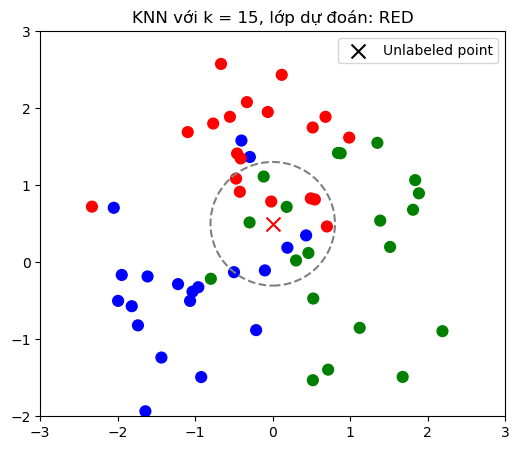

✅ Đã lưu GIF: knn_k_change.gif


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# 1️⃣ Tạo dữ liệu 3 cụm gần nhau
X, y = make_blobs(
    n_samples=60,
    centers=[(-1, 0), (1, 0), (0, 1.5)],
    cluster_std=0.8,
    random_state=3
)

# 2️⃣ Tạo điểm chưa gán nhãn nằm gần giữa
new_point = np.array([[0, 0.5]])

# 3️⃣ Chuẩn bị vẽ
fig, ax = plt.subplots(figsize=(6, 5))

# Màu cố định cho từng lớp
color_map = {0: 'blue', 1: 'green', 2: 'red'}
color_name = {0: 'blue', 1: 'green', 2: 'red'}

# Tô màu cho từng cụm
colors = [color_map[label] for label in y]
sc = ax.scatter(X[:, 0], X[:, 1], c=colors, s=60)

# Điểm chưa gán nhãn
pt = ax.scatter([], [], c='black', s=100, marker='x', label='Unlabeled point')

# Vòng tròn thể hiện phạm vi tìm k láng giềng gần nhất
circle = plt.Circle((0, 0), 0, color='gray', fill=False, linestyle='--', lw=1.5)
ax.add_patch(circle)

ax.legend()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 3)
ax.set_title("KNN Classification as k Increases")

# 4️⃣ Danh sách giá trị k
k_values = range(1, 16)

# 5️⃣ Hàm khởi tạo
def init():
    pt.set_offsets(new_point)
    circle.set_center(new_point[0])
    circle.set_radius(0)
    return sc, pt, circle

# 6️⃣ Hàm cập nhật animation
def update(frame):
    k = k_values[frame]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(new_point)[0]

    # Tính khoảng cách giữa điểm mới và các điểm huấn luyện
    distances = np.sqrt(((X - new_point) ** 2).sum(axis=1))
    sorted_idx = np.argsort(distances)
    radius = distances[sorted_idx[k - 1]]  # bán kính bao hàng xóm thứ k

    # Cập nhật vòng tròn bao hàng xóm
    circle.set_radius(radius)

    # Cập nhật màu điểm dự đoán theo lớp
    pt.set_color(color_map[pred])

    # Hiển thị tiêu đề bằng chữ thay vì số
    color_text = color_name[pred]
    ax.set_title(f"KNN với k = {k}, lớp dự đoán: {color_text.upper()}")

    return sc, pt, circle

# 7️⃣ Tạo animation
ani = FuncAnimation(fig, update, frames=len(k_values),
                    init_func=init, interval=800, repeat=False)

# 8️⃣ Lưu ảnh GIF
writer = PillowWriter(fps=1)
ani.save("knn_k_change.gif", writer=writer)

plt.show()
print("✅ Đã lưu GIF: knn_k_change.gif")
